In [1]:
from L420A import everything

In [2]:
everything.setup()

Biosphere database already present!!! No setup is needed
Database has already been imported


In [3]:
everything.bd.projects.set_current('MCCFF')

In [5]:
everything.bd.databases

Databases dictionary with 16 object(s):
	SSP2-Base_2020
	SSP2-Base_2030
	SSP2-Base_2040
	SSP2-Base_2050
	SSP2-Base_2060
	SSP2-Base_2070
	SSP2-Base_2080
	SSP2-RCP26_2020
	SSP2-RCP26_2030
	SSP2-RCP26_2040
	SSP2-RCP26_2050
	SSP2-RCP26_2060
	SSP2-RCP26_2070
	SSP2-RCP26_2080
	biosphere3
	ecoinvent-3.9.1-cuttoff

In [6]:
everything.constructor_main(file = 'Case_study_existing_building_wEOL_4.xlsx', sheet = 'Construction')

In [7]:
everything.renovation_main(file = 'Case_study_existing_building_wEOL_4.xlsx', sheet = 'Renovation')

In [8]:
mfa = everything.Mfa(2020, 2080)

In [9]:
for product in everything.Product.real_instances:
    mfa.add_renovation_points(product)

In [10]:
for product in everything.Product.real_instances:
    mfa.add_eol_points(product)

In [11]:
mfa.points

[(2046, polyethylene production, high density, granulate),
 (2046, steel production, converter, low-alloyed),
 (2046, hot water tank production, 600l),
 (2046, heat pump production),
 (2046, evacuated tube collector production),
 (2046, ventilation duct production, steel, 100x50 mm),
 (2050, window frame production, wood, U=1.5 W/m2K),
 (2055, wood wool production),
 (2055, gypsum plasterboard production),
 (2055, polyethylene production, low density, granulate),
 (2055, market for concrete slab),
 (2055, concrete roof tile production),
 (2055, wood wool production),
 (2055, fibre cement roof slate production),
 (2055, gypsum plasterboard production),
 (2055, polyethylene production, low density, granulate),
 (2058, polyethylene production, low density, granulate),
 (2058, wood wool production),
 (2060, flat glass production, coated),
 (2060,
  concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates),
 (2060,
  concrete produc

In [12]:
clean_list_renovation= mfa.clean_list_renovation()

In [13]:
clean_list_eol = mfa.clean_list_eol()

In [14]:
# extend the renovation list with the eol list
clean_list = clean_list_renovation + clean_list_eol

In [15]:
lca = everything.ProLCA(activities_and_years=clean_list, yearly_databases=mfa.create_time_line_dict(), 
                         methods=[('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)'), ('EF v3.0 EN15804', 'acidification', 'accumulated exceedance (AE)')],
                         products=everything.Product.real_instances)

In [16]:
operational = lca.give_me_operational()

26
4
48830.63318870468
48830.63318870468
5
61091.09363970354
61091.09363970354
3
36126.448196349666
36126.448196349666
22
261056.48967538835
261056.48967538835


In [17]:
production_lci = lca.production_lca()

In [18]:
other_lci = lca.give_me_embodied()

SSP2-Base_2040 1580abc0d8542f9117775cc18e264f97
SSP2-RCP26_2040 1580abc0d8542f9117775cc18e264f97
SSP2-Base_2040 2c559dbc4e822b444792e122dffe6c20
SSP2-RCP26_2040 2c559dbc4e822b444792e122dffe6c20
SSP2-Base_2040 89cb4e1a47b707fe43b99135b81fcaba
SSP2-RCP26_2040 89cb4e1a47b707fe43b99135b81fcaba
SSP2-Base_2040 1c2dd8677907f88a0746b958ca4efd43
SSP2-RCP26_2040 1c2dd8677907f88a0746b958ca4efd43
SSP2-Base_2040 6032fcb0a208bdcdab5633d6be417d0e
SSP2-RCP26_2040 6032fcb0a208bdcdab5633d6be417d0e
SSP2-Base_2040 adc6bbccf3d5b2955b050510e647852a
SSP2-RCP26_2040 adc6bbccf3d5b2955b050510e647852a
SSP2-Base_2050 0b4ac2320024c8b8cce38bd333b9817f
SSP2-RCP26_2050 0b4ac2320024c8b8cce38bd333b9817f
SSP2-Base_2050 93f25e8a8b68f240f61f18dcd270ba1f
SSP2-RCP26_2050 93f25e8a8b68f240f61f18dcd270ba1f
SSP2-Base_2050 872789ceaa2901313d31635a713c100e
SSP2-RCP26_2050 872789ceaa2901313d31635a713c100e
SSP2-Base_2050 3f058e3bf6791c71e3b121c63c75eba4
SSP2-RCP26_2050 3f058e3bf6791c71e3b121c63c75eba4
SSP2-Base_2050 ff8c32b4d54c57a

In [20]:
# pickle other lci
import pickle
with open('other_lci2.pickle', 'wb') as handle:
    pickle.dump(other_lci, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # pickle production lci
# import pickle
with open('production_lci2.pickle', 'wb') as handle:
    pickle.dump(production_lci, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# unpickle production lci and other lci
# import pickle
# with open('production_lci.pickle', 'rb') as handle:
#     production_lci = pickle.load(handle)
    
# with open('other_lci.pickle', 'rb') as handle:
#     other_lci = pickle.load(handle)

In [21]:
def aggregation_renovation_eol():
    lci_renovation_eol = other_lci.copy()
    clean_list_copy = clean_list.copy()
    aggregated_results = {}
    # loop over the lci renovation eol dictionary and clean list
    # check if the activity matches the clean list is in the lci dictionary
    # multiply the lci dictionary with the clean list and add the results to a list
    for key, value in lci_renovation_eol.items():
        for i in clean_list_copy:
            
            if key[1] == i[1]:
                if len(value) > 1:
                    # multiply each value in the list by the amount
                    result = [x*i[2].amount for x in value]
                    aggregated_results[(i[0], i[2], key[2])] = result
    return aggregated_results
aggreat = aggregation_renovation_eol()

In [22]:
# append aggregated results to the production lci to a new dictionary
full_results = {}
for key, value in production_lci.items():
    full_results[key] = value
for key, value in aggreat.items():
    full_results[key] = value
for key, value in operational.items():
    full_results[key] = value
full_results


{(2020,
  concrete_foundation_production,
  'ecoinvent-3.9.1-cuttoff'): [13872.880638500286, 43.99707920471239],
 (2020,
  polystyrene foam slab production, 45% recycled,
  'ecoinvent-3.9.1-cuttoff'): [3419.038665225468, 12.786087097917745],
 (2020,
  polyethylene production, low density, granulate,
  'ecoinvent-3.9.1-cuttoff'): [319.209695386447, 1.1410022020801207],
 (2020,
  fibreboard production, hard,
  'ecoinvent-3.9.1-cuttoff'): [202.85713958731665, 4.3870538907674375],
 (2020,
  steel production, low-alloyed, hot rolled,
  'ecoinvent-3.9.1-cuttoff'): [1819.3230344217818, 7.737518979739819],
 (2020,
  concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates,
  'ecoinvent-3.9.1-cuttoff'): [0.0, 0.0],
 (2020,
  glass wool mat production,
  'ecoinvent-3.9.1-cuttoff'): [2473.579532791892, 26.075566322188127],
 (2020,
  gypsum plasterboard production,
  'ecoinvent-3.9.1-cuttoff'): [494.72569017911144, 3.0273015047543606],
 (2

In [23]:
def distribute_impacts(input_dict):
    new_dict = {}
    for key, value in input_dict.items():
        year, product, db_name = key
        print(product)
        # if product is of instance Product then skip it
        if isinstance(product, everything.Product):
            new_dict[key] = value
            continue
        elif "market for electricity" in product['name'] or "market for natural gas" in product['name']:
            for y in range(2020, year + 1):
                new_key = (y, product, db_name)
                # Distributing impact evenly over the years
                new_value = [v/(year-2020+1) for v in value]
                new_dict[new_key] = new_value
        else:
            new_dict[key] = value
    return new_dict
new = distribute_impacts(full_results)

concrete_foundation_production
polystyrene foam slab production, 45% recycled
polyethylene production, low density, granulate
fibreboard production, hard
steel production, low-alloyed, hot rolled
concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates
glass wool mat production
gypsum plasterboard production
polyethylene production, high density, granulate, recycled
polyethylene production, low density, granulate
concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates
window frame production, aluminium, U=1.6 W/m2K
door production, outer, wood-glass
fibre cement corrugated slab production
market for plywood
concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates
concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates
gypsum plasterboard production
con

In [ ]:
new

{(2020,
  concrete_foundation_production,
  'ecoinvent-3.9.1-cuttoff'): [13872.880638500286, 43.99707920471239],
 (2020,
  polystyrene foam slab production, 45% recycled,
  'ecoinvent-3.9.1-cuttoff'): [3419.038665225468, 12.786087097917745],
 (2020,
  polyethylene production, low density, granulate,
  'ecoinvent-3.9.1-cuttoff'): [319.209695386447, 1.1410022020801207],
 (2020,
  fibreboard production, hard,
  'ecoinvent-3.9.1-cuttoff'): [202.85713958731665, 4.3870538907674375],
 (2020,
  steel production, low-alloyed, hot rolled,
  'ecoinvent-3.9.1-cuttoff'): [1819.3230344217818, 7.737518979739819],
 (2020,
  concrete production, 25MPa, for building construction, for interior use, with cement ZN/D, with 50% RC-C aggregates,
  'ecoinvent-3.9.1-cuttoff'): [0.0, 0.0],
 (2020,
  glass wool mat production,
  'ecoinvent-3.9.1-cuttoff'): [2473.579532791892, 26.075566322188127],
 (2020,
  gypsum plasterboard production,
  'ecoinvent-3.9.1-cuttoff'): [494.72569017911144, 3.0273015047543606],
 (2

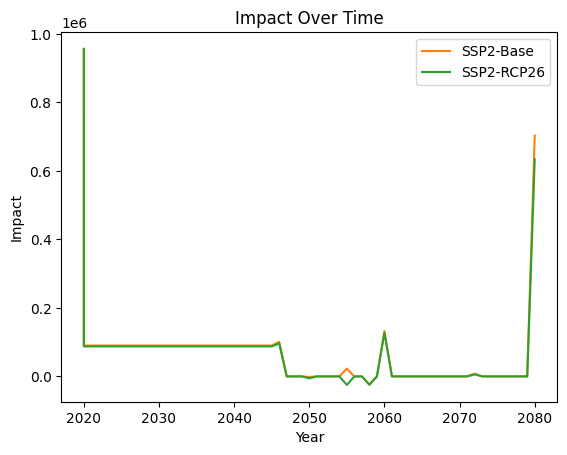

In [24]:
import matplotlib.pyplot as plt

def calculate_2020_sum(input_dict, impact_index):
    sum_2020 = 0
    for key, value in input_dict.items():
        if key[0] == 2020:
            sum_2020 += value[impact_index]
    return sum_2020

def extract_and_aggregate(db, input_dict, impact_index):
    data = {}
    for key, value in input_dict.items():
        year, _, db_name = key
        if '_'.join(db_name.split('_')[:-1]) == db:
            data[year] = data.get(year, 0) + value[impact_index]
    return data

def create_line_plot(input_dict, impact_index):
    sum_2020 = calculate_2020_sum(input_dict, impact_index)
    
    databases = set('_'.join(key[2].split('_')[:-1]) for key in input_dict.keys())  
    
    for db in databases:
        data = extract_and_aggregate(db, input_dict, impact_index)
        
        # Sort data by years
        sorted_data = sorted(data.items())
        
        years, impacts = zip(*sorted_data)
        
        # Inserting the summed 2020 data at the beginning
        years = (2020,) + years
        impacts = (sum_2020,) + impacts
        
        # Plotting
        plt.plot(years, impacts, label=db)
    
    plt.xlabel("Year")
    plt.ylabel("Impact")
    plt.legend()
    plt.title("Impact Over Time")
    plt.show()
    
create_line_plot(new, 0)

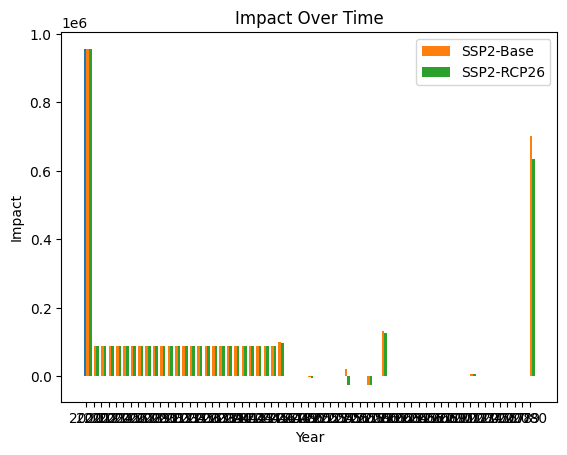

In [25]:
import matplotlib.pyplot as plt

def calculate_2020_sum(input_dict, impact_index):
    sum_2020 = 0
    for key, value in input_dict.items():
        if key[0] == 2020:
            sum_2020 += value[impact_index]
    return sum_2020

def extract_and_aggregate(db, input_dict, impact_index):
    data = {}
    for key, value in input_dict.items():
        year, _, db_name = key
        if '_'.join(db_name.split('_')[:-1]) == db:
            data[year] = data.get(year, 0) + value[impact_index]
    return data

def create_bar_plot(input_dict, impact_index):
    sum_2020 = calculate_2020_sum(input_dict, impact_index)
    
    databases = set('_'.join(key[2].split('_')[:-1]) for key in input_dict.keys())
    
    all_years = sorted(set(key[0] for key in input_dict.keys()))
    bar_width = 0.35  # Adjust as needed
    
    fig, ax = plt.subplots()
    
    for db_idx, db in enumerate(databases):
        data = extract_and_aggregate(db, input_dict, impact_index)
        
        # Sort data by years
        sorted_data = {year: data.get(year, 0) for year in all_years}
        
        years, impacts = zip(*sorted_data.items())
        
        # Adding the summed 2020 data at the beginning
        years = (2020,) + years
        impacts = (sum_2020,) + impacts
        
        # Creating bar for each database
        ax.bar(
            [year + (db_idx * bar_width) for year in years],
            impacts,
            width=bar_width,
            label=db
        )
    
    ax.set_xlabel("Year")
    ax.set_ylabel("Impact")
    ax.set_title("Impact Over Time")
    ax.legend()
    
    # Adjust x-ticks to be in the center of the grouped bars
    ax.set_xticks([year + (bar_width / 2) for year in all_years])
    ax.set_xticklabels(all_years)
    
    plt.show()

# Replace 'new' with your input data dictionary
create_bar_plot(new, 0)


In [33]:
import pandas as pd

data = {
    (2050, 'window frame production, wood, U=1.5 W/m2K', 'SSP2-RCP19_2050'): [-1.7864920218585827, -0.013551763402401773],
    (2050, 'window frame production, wood, U=1.5 W/m2K', 'SSP2-RCP26_2050'): [-1.7913165974298542, -0.013546746203492794],
    #... other data points
}

# Create a DataFrame and organize data
df = pd.DataFrame([
    {
        'Year': key[0],
        'Production Type': key[1],
        'Scenario': key[2],
        'Value1': value[0],
        'Value2': value[1]
    }
    for key, value in new.items()
])

print(df.head())
df.to_csv('output.csv', index=False)


   Year                                  Production Type  \
0  2020                   concrete_foundation_production   
1  2020   polystyrene foam slab production, 45% recycled   
2  2020  polyethylene production, low density, granulate   
3  2020                      fibreboard production, hard   
4  2020        steel production, low-alloyed, hot rolled   

                  Scenario        Value1     Value2  
0  ecoinvent-3.9.1-cuttoff  13872.880639  43.997079  
1  ecoinvent-3.9.1-cuttoff   3419.038665  12.786087  
2  ecoinvent-3.9.1-cuttoff    319.209695   1.141002  
3  ecoinvent-3.9.1-cuttoff    202.857140   4.387054  
4  ecoinvent-3.9.1-cuttoff   1819.323034   7.737519  


/tmp/ipykernel_73245/3505633602.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Value1', hue='Scenario', marker="o", ci=None)


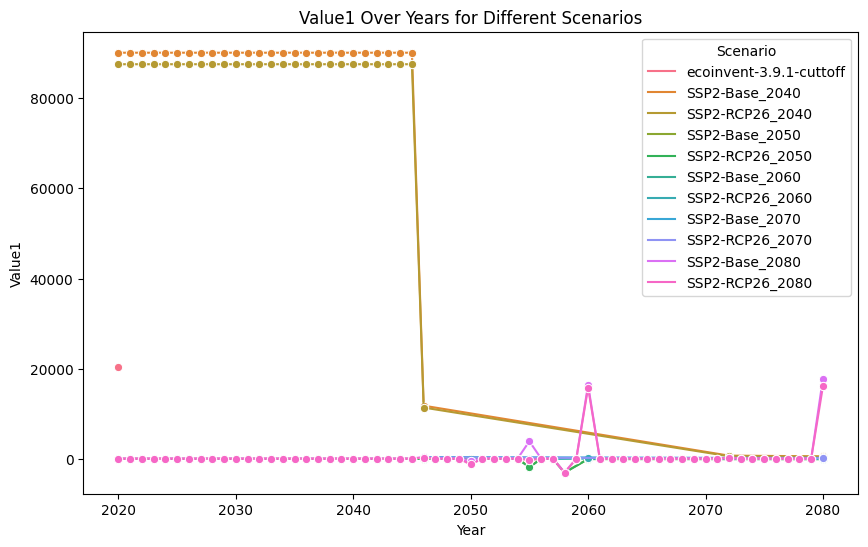

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

#... [Assuming `df` is defined as per the previous code snippet]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Value1', hue='Scenario', marker="o", ci=None)
plt.title('Value1 Over Years for Different Scenarios')
plt.ylabel('Value1')
plt.xlabel('Year')
plt.show()


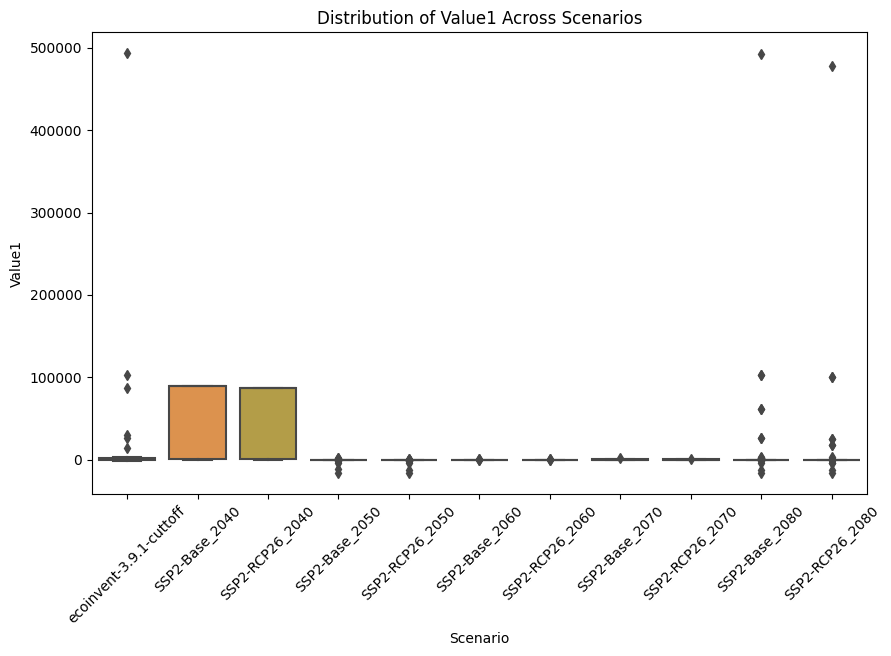

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Scenario', y='Value1')
plt.title('Distribution of Value1 Across Scenarios')
plt.ylabel('Value1')
plt.xlabel('Scenario')
plt.xticks(rotation=45)
plt.show()


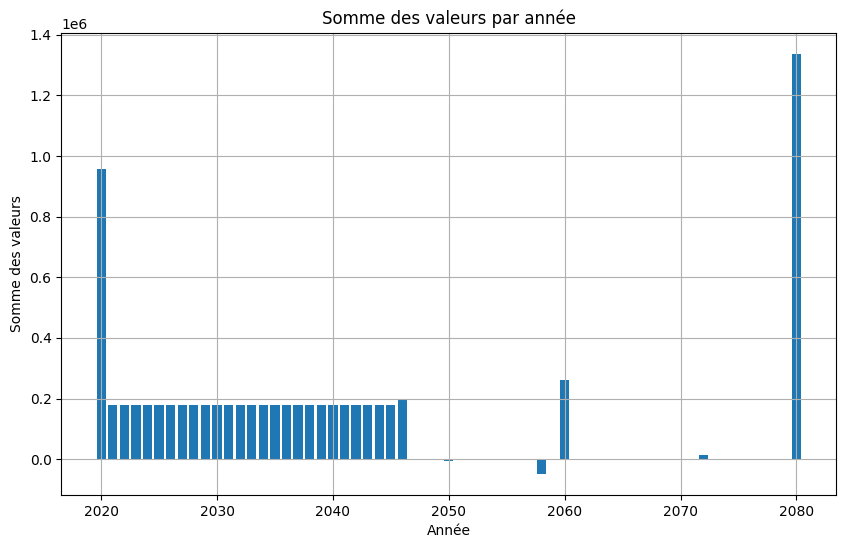

In [34]:
import matplotlib.pyplot as plt

sum_by_year = {}
data_dict = new

for key, values in data_dict.items():
    year = key[0]
    value = values[0]

    if year in sum_by_year:
        sum_by_year[year] += value
    else:
        sum_by_year[year] = value


years = list(sum_by_year.keys())
values = list(sum_by_year.values())

plt.figure(figsize=(10, 6))
plt.bar(years, values)
plt.title('Somme des valeurs par année')
plt.xlabel('Année')
plt.ylabel('Somme des valeurs')
plt.grid(True)
plt.show()
